# Titanic Data Competiton

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
%matplotlib inline

from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [75]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning

The first part is to identify what segments of data are missing.

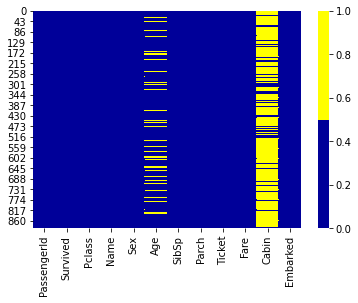

In [77]:
cols = train_data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

Droping Missing Data of cabin and replaceing missing age with median

In [78]:
train_data['Title'] = train_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [79]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Embarked', axis=1, inplace=True)

med = train_data['Age'].median()
print(med)
train_data['Age'] = train_data['Age'].fillna(med)
train_data.head()

28.0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,Mr


In [80]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df


In [81]:
train_data = dummyEncode(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,1,22.0,1,0,523,7.2500,11
1,2,1,1,0,38.0,1,0,596,71.2833,12
2,3,1,3,0,26.0,0,0,669,7.9250,8
3,4,1,1,0,35.0,1,0,49,53.1000,12
4,5,0,3,1,35.0,0,0,472,8.0500,11


# Analysis

Graphs with high correlation to 'Survival'

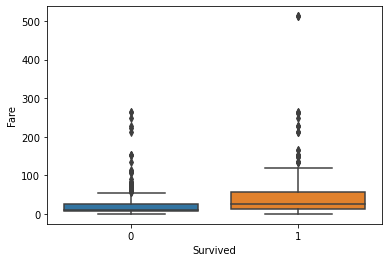

In [83]:
sns.boxplot(x="Survived", y="Fare", data=train_data)

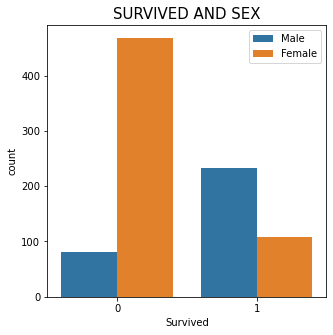

In [95]:
plt.figure(figsize=(5,5))
barSvS = sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)
plt.title("SURVIVED AND SEX",size=15)
barSvS.legend(["Male", "Female"])

Text(0.5, 1.0, 'SURVIVED AND PCLASS')

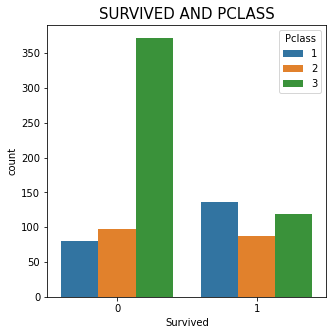

In [91]:
plt.figure(figsize=(5,5))
barSvP =sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)
plt.title("SURVIVED AND PCLASS",size=15)
barSvP.legend(["First Class", "Second Class", "Third Class"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
